In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\pyml_scripts\chapter04_logregression\SMSSpamCollection',delimiter='\t',header=None,names=["label","message"])

In [3]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
print('spam:',df[df['label'] == 'spam']['label'].count())
print('ham:',df[df['label'] == 'ham']['label'].count())

spam: 747
ham: 4825


In [7]:
4825/5572   #在此範例中,訓練精確度應該要大於0.87

0.8659368269921034

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
X_train_raw, X_test_raw, y_train, y_test =train_test_split(df['message'],df['label'])
vectorizer = TfidfVectorizer()                  #應用分詞器將message分解為term
X_train = vectorizer.fit_transform(X_train_raw) # fit_transform(x) = fit(x)+transform(x)
X_test = vectorizer.transform(X_test_raw)

In [10]:
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_train,y_train)   #訓練集精確度

0.9755922469490309

In [12]:
clf.score(X_test, y_test)    #測試集精確度

0.9619526202440776

In [13]:
predictions = clf.predict(X_test)  
for i, prediction in enumerate(predictions[-10:]):   #顯示測試資料集中,最後10筆的預測分類
    print('Predict type:%s. message:%s' % (prediction,X_test_raw.iloc[i]))

Predict type:ham. message:Everybody had fun this evening. Miss you.
Predict type:ham. message:Todays Vodafone numbers ending with 4882 are selected to a receive a £350 award. If your number matches call 09064019014 to receive your £350 award.
Predict type:ham. message:Let me know when you've got the money so carlos can make the call
Predict type:ham. message:Yes I know the cheesy songs from frosty the snowman :)
Predict type:ham. message:Yeah there's barely enough room for the two of us, x has too many fucking shoes. Sorry man, see you later
Predict type:ham. message:Shopping? Eh ger i toking abt syd leh...Haha
Predict type:ham. message:But we havent got da topic yet rite?
Predict type:ham. message:Is that what time you want me to come?
Predict type:ham. message:Sad story of a Man - Last week was my b'day. My Wife did'nt wish me. My Parents forgot n so did my Kids . I went to work. Even my Colleagues did not wish. As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt speci

In [14]:
clf_c1M = LogisticRegression(C=1000000.0)   #C越大,越要求model擬合訓練資料
clf_c1M.fit(X_train, y_train)
clf_c1M.score(X_train,y_train) 

1.0

In [15]:
clf_c1M.score(X_test,y_test) 

0.9856424982053122

In [16]:
clf_c00001 = LogisticRegression(C=0.00001)   #C越小,越不要求model擬合訓練資料
clf_c00001.fit(X_train, y_train)
clf_c00001.score(X_train,y_train) 

0.8628858578607322

In [17]:
clf_c00001.score(X_test,y_test) 

0.8750897343862168

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

#list的element當作一個document,目前contents有3個element
contents = ['In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.[1] It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf-idf value increases proportionally to the number of times a word appears in the document and is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general. Tf-idf is one of the most popular term-weighting schemes today; 83% of text-based recommender systems in digital libraries use tf-idf.[2]',
            'of the tf–idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document''s relevance given a user query. tf–idf can be successfully used for stop-words filtering in various subject fields, including text summarization and classification.',
            'One of the simplest ranking functions is computed by summing the tf–idf for each query term; many more sophisticated ranking functions are variants of this simple model.']

CVect = CountVectorizer()
#將每個document進行分詞並計算出現頻率,且轉換為陣列
contents_cv = CVect.fit_transform(contents)

In [19]:
contents_cv.toarray()

array([[1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 3, 0, 0, 0, 1,
        1, 0, 0, 2, 3, 1, 0, 1, 0, 1, 1, 4, 1, 7, 0, 1, 2, 1, 1, 6, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 5, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 4, 1, 2, 8,
        0, 1, 4, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 3, 1],
       [0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2,
    

In [44]:
CVect.get_feature_names_out

<bound method CountVectorizer.get_feature_names_out of CountVectorizer()>

In [22]:
#get_feature_names顯示分詞後的詞有哪些
#請注意Scikit-learn版本差異
#get_feature_names()在新版本更名為get_feature_names_out()
word = CVect.get_feature_names_out()
print(word)

['83' 'adjust' 'and' 'appear' 'appears' 'are' 'as' 'based' 'be' 'by' 'can'
 'central' 'classification' 'collection' 'computed' 'corpus' 'digital'
 'document' 'documents' 'each' 'engines' 'fact' 'factor' 'fields'
 'filtering' 'for' 'frequency' 'frequently' 'functions' 'general' 'given'
 'helps' 'how' 'idf' 'important' 'in' 'including' 'increases'
 'information' 'intended' 'inverse' 'is' 'it' 'libraries' 'many' 'mining'
 'model' 'modeling' 'more' 'most' 'number' 'numerical' 'of' 'offset'
 'often' 'one' 'or' 'popular' 'proportionally' 'query' 'ranking'
 'recommender' 'reflect' 'relevance' 'retrieval' 'scheme' 'schemes'
 'scoring' 'search' 'searches' 'short' 'simple' 'simplest' 'some'
 'sophisticated' 'statistic' 'stop' 'subject' 'successfully'
 'summarization' 'summing' 'systems' 'term' 'text' 'tf' 'tfidf' 'that'
 'the' 'this' 'times' 'to' 'today' 'tool' 'use' 'used' 'user' 'value'
 'variants' 'various' 'weighting' 'which' 'word' 'words']


In [24]:
#目前contents_zhtw有2個element
contents_zhtw = ['美國民主黨籍候選人拜登在賓州、喬治亞州的得票率翻盤領先川普，拜登預計於美東時間6日晚間（台灣時間7日上午）發表演說。對此，川普發推文表示，拜登不該錯誤聲稱宣布自己是總統，「我也可以這樣說」。',
                 '川普6日晚間發推文說，「拜登不該錯誤地宣稱自己是總統，不然我也可以這樣說」，強調所有選舉的法律程序才剛剛開始。']

CVect_zhtw = CountVectorizer()
contents_zhtw_cv = CVect_zhtw.fit_transform(contents_zhtw)
word_zhtw = CVect_zhtw.get_feature_names_out()
print(word_zhtw)

['不然我也可以這樣說' '台灣時間7日上午' '喬治亞州的得票率翻盤領先川普' '對此' '川普6日晚間發推文說' '川普發推文表示'
 '強調所有選舉的法律程序才剛剛開始' '我也可以這樣說' '拜登不該錯誤地宣稱自己是總統' '拜登不該錯誤聲稱宣布自己是總統'
 '拜登預計於美東時間6日晚間' '發表演說' '美國民主黨籍候選人拜登在賓州']


In [26]:
#如果尚未安裝jieba,請自行使用pip install jieba安裝,注意所使用的Anaconda環境
import jieba 
jieba.set_dictionary(r'c:\pyml_scripts\jieba\dict.txt.big.txt')         #中文字典,jieba可以載入兩個字典檔

def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords  

def seg_sentence(sentence):  
    sentence_seged = jieba.cut(sentence.strip())  
    stopwords = stopwordslist(r'C:\pyml_scripts\jieba\stopkey_cht.txt')  # 載入口語贅詞等列表  
    outstr = ''  
    for word in sentence_seged:     #移除贅詞
        if word not in stopwords:  
            if word != '\t':  
                outstr += word  
                outstr += " "  
    return outstr 

contents_zhtw_token=[]
for line in contents_zhtw:  
    line_seg = seg_sentence(line)
    contents_zhtw_token.append(line_seg)
    print(line_seg)

Building prefix dict from c:\pyml_scripts\jieba\dict.txt.big.txt ...
Dumping model to file cache C:\Users\Admin\AppData\Local\Temp\jieba.u133340a961180d416b28225332a46bcd.cache
Loading model cost 1.928 seconds.
Prefix dict has been built successfully.


美國民主黨 籍 候選人 拜登 賓州 喬治亞州 得票率 翻盤 領先 川普 拜登 預計 美東 時間 日 晚間 台灣 時間 日 上午 發表演說 對此 川普發 推文 表示 拜登 不該 錯誤 聲稱 宣布 總統 「 說 」 
川普 日 晚間 發推 文說 「 拜登 不該 錯誤 宣稱 總統 說 」 強調 所有 選舉 法律 程序 剛剛開始 


In [27]:
contents_zhtw_token

['美國民主黨 籍 候選人 拜登 賓州 喬治亞州 得票率 翻盤 領先 川普 拜登 預計 美東 時間 日 晚間 台灣 時間 日 上午 發表演說 對此 川普發 推文 表示 拜登 不該 錯誤 聲稱 宣布 總統 「 說 」 ',
 '川普 日 晚間 發推 文說 「 拜登 不該 錯誤 宣稱 總統 說 」 強調 所有 選舉 法律 程序 剛剛開始 ']

In [29]:
CVect_zhtw = CountVectorizer()
zhtw_cv = CVect_zhtw.fit_transform(contents_zhtw_token)
word_zhtw = CVect_zhtw.get_feature_names_out()
print(word_zhtw)

['上午' '不該' '候選人' '剛剛開始' '台灣' '喬治亞州' '宣布' '宣稱' '對此' '川普' '川普發' '強調' '得票率'
 '所有' '拜登' '推文' '文說' '時間' '晚間' '法律' '發推' '發表演說' '程序' '總統' '美國民主黨' '美東'
 '翻盤' '聲稱' '表示' '賓州' '選舉' '錯誤' '預計' '領先']


In [30]:
TfidfTran = TfidfTransformer()
#計算tfidf權重
word_tfidf = TfidfTran.fit_transform(contents_cv)
word_weight = word_tfidf.toarray()
word_df = pd.DataFrame(word_weight,columns=word)
print(word_df)

         83    adjust       and    appear   appears       are        as  \
0  0.068938  0.068938  0.104858  0.068938  0.068938  0.000000  0.052429   
1  0.000000  0.000000  0.252347  0.000000  0.000000  0.126173  0.126173   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.155339  0.000000   

      based        be        by  ...       use      used      user     value  \
0  0.068938  0.000000  0.040716  ...  0.068938  0.052429  0.052429  0.068938   
1  0.000000  0.165903  0.097985  ...  0.000000  0.252347  0.126173  0.000000   
2  0.000000  0.000000  0.120635  ...  0.000000  0.000000  0.000000  0.000000   

   variants   various  weighting     which      word     words  
0  0.000000  0.000000   0.104858  0.068938  0.206813  0.052429  
1  0.000000  0.165903   0.126173  0.000000  0.000000  0.126173  
2  0.204252  0.000000   0.000000  0.000000  0.000000  0.000000  

[3 rows x 103 columns]


[[1215    4]
 [  49  125]]


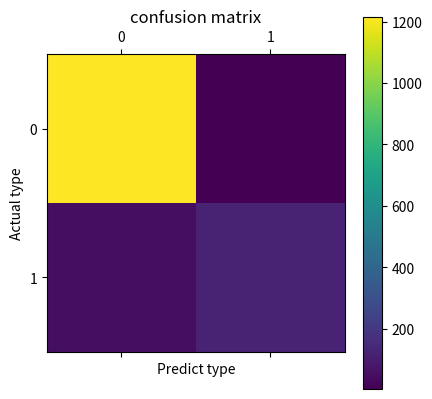

In [31]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
%matplotlib inline

y_pred = clf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('Actual type')
plt.xlabel('Predict type')
plt.show()  

In [32]:
print(y_pred)

['ham' 'spam' 'ham' ... 'ham' 'ham' 'ham']


In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [34]:
modelg = GaussianNB()
modelg.fit(X_train.toarray(), y_train)
modelg.score(X_test.toarray(),y_test)

0.8901651112706389

In [35]:
modelm = MultinomialNB()
modelm.fit(X_train, y_train)
modelm.score(X_test,y_test)

0.9641062455132807

In [36]:
modelb = BernoulliNB()
modelb.fit(X_train, y_train)
modelb.score(X_test,y_test)

0.9741564967695621

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print(accuracy_score(y_test,y_pred))

0.9619526202440776


In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
df = pd.read_csv('C:\pyml_scripts\chapter04_logregression\SMSSpamCollection',delimiter='\t',header=None)
X_train_raw, X_test_raw, y_train, y_test =train_test_split(df[1],df[0])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [41]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = np.array([number[0] for number in lb.fit_transform(y_train)])

In [42]:
precisions = cross_val_score(classifier, X_train, y_train, cv=5)
print('Accuancy:', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
print('Recalls:', np.mean(recalls), recalls) 
f1 = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
print('F1: ', np.mean(f1), f1)

Accuancy: 0.9530971549723519 [0.95933014 0.95574163 0.95454545 0.94976077 0.94610778]
Recalls: 0.6473938223938224 [0.69642857 0.66666667 0.65765766 0.62162162 0.59459459]
F1:  0.7853920541959173 [0.82105263 0.8        0.79347826 0.76666667 0.74576271]


In [43]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.7961234745154343